<a href="https://colab.research.google.com/github/sarah-emmylle/tcc_estress/blob/main/TCC_ESTRESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas**

In [ ]:
import math as mt
import numpy as np
import sympy as sp
import pandas as pd
import statistics as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.stats as sc
from scipy.stats import spearmanr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
pip install pandas scikit-learn openpyxl


# **Banco de dados**

In [ ]:
data = pd.read_excel('DB_TCC_FINAL.xlsx')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31761 entries, 0 to 31760
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   educacao            31761 non-null  object
 1   local               31761 non-null  object
 2   genero              31761 non-null  object
 3   idade               31761 non-null  int64 
 4   estado civil        31761 non-null  object
 5   número de filhos    31761 non-null  int64 
 6   area_formacao       31761 non-null  object
 7   formacao            31761 non-null  object
 8   nivel_ansiedae      31761 non-null  object
 9   nivel_depressao     31761 non-null  object
 10  nivel_estresse      31761 non-null  object
 11  estresse            31761 non-null  object
 12  categoria_educacao  31761 non-null  object
 13  grandes_areas       31761 non-null  object
dtypes: int64(2), object(12)
memory usage: 3.4+ MB


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Carregar os dados
data = pd.read_excel('DB_TCC_FINAL.xlsx')

# Lista de variáveis de interesse
vars_of_interest = ['educacao', 'local', 'genero', 'idade', 'estado civil','grandes_areas']

# Função para realizar o teste qui-quadrado
def chi_square_test(variable):
    # Criar tabela de contingência
    contingency_table = pd.crosstab(data[variable], data['estresse'])
    # Calcular o teste qui-quadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p, dof, expected

# Aplicar o teste para cada variável e armazenar os resultados
results = {var: chi_square_test(var) for var in vars_of_interest}

# Exibir os resultados
for var, (chi2, p, dof, expected) in results.items():
    print(f"Variable: {var}")
    print(f"Chi2: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies:\n{expected}\n")


Variable: educacao
Chi2: 62.98735836924243
P-value: 6.827595815959352e-13
Degrees of Freedom: 4
Expected Frequencies:
[[   22.11054438   386.88945562]
 [  606.82362016 10618.17637984]
 [  801.00717862 14015.99282138]
 [   21.89430434   383.10569566]
 [  265.16435251  4639.83564749]]

Variable: local
Chi2: 2.2366479851485344
P-value: 0.32682710049793423
Degrees of Freedom: 2
Expected Frequencies:
[[  384.47479613  6727.52520387]
 [  572.38739334 10015.61260666]
 [  760.13781052 13300.86218948]]

Variable: genero
Chi2: 158.8335022957977
P-value: 2.0347904615981073e-36
Degrees of Freedom: 1
Expected Frequencies:
[[  392.25943768  6863.74056232]
 [ 1324.74056232 23180.25943768]]

Variable: idade
Chi2: 334.80041698119675
P-value: 5.905211279052254e-38
Degrees of Freedom: 65
Expected Frequencies:
[[1.59477032e+02 2.79052297e+03]
 [1.85047417e+02 3.23795258e+03]
 [2.00454520e+02 3.50754548e+03]
 [1.87155757e+02 3.27484424e+03]
 [1.58828311e+02 2.77917169e+03]
 [1.34014767e+02 2.34498523e+03]


In [ ]:
pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.2 MB/s eta 0:00:00


In [ ]:
from docx import Document
from docx.enum.table import WD_TABLE_ALIGNMENT
from docx.shared import Pt

# Criar um documento Word
doc = Document()

# Adicionar título à tabela
doc.add_heading('Características da amostra: tabela descritiva bivariada', level=2)

# Adicionar tabela
table = doc.add_table(rows=1, cols=4)

# Definir os títulos das colunas
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variável'
hdr_cells[1].text = ''
hdr_cells[2].text = 'Não'
hdr_cells[3].text = 'Sim'

# Dados da tabela
data = [
    ('Local', 'Rural (campo)', '54 (20%)', '7.058 (22%)'),
    ('', 'Suburbano', '97 (36%)', '10.491 (33%)'),
    ('', 'Urbano (vila, cidade)', '116 (43%)', '13.945 (44%)'),
    ('Estado civil', 'Casado anteriormente', '15 (5.6%)', '1.035 (3.3%)'),
    ('', 'Casado atualmente', '79 (30%)', '4.177 (13%)'),
    ('', 'Nunca casado', '173 (65%)', '26.282 (83%)'),
    ('Gênero', 'Homem', '114 (43%)', '7.142 (23%)'),
    ('', 'Mulher', '153 (57%)', '24.352 (77%)'),
    ('Grande área de formação', 'Exatas e Natureza', '96 (36%)', '8.951 (28%)'),
    ('', 'Finanças', '35 (13%)', '4.604 (15%)'),
    ('', 'Humanas', '33 (12%)', '5.897 (19%)'),
    ('', 'Outros', '2 (0.7%)', '526 (1.7%)'),
    ('', 'Saúde e Biológicas', '59 (22%)', '5.667 (18%)'),
    ('', 'Sem formação', '42 (16%)', '5.849 (19%)'),
    ('Educação', 'Ensino médio', '73 (27%)', '11.152 (35%)'),
    ('', 'Graduação universitária', '122 (46%)', '14.695 (47%)'),
    ('', 'Menos que ensino médio', '6 (2.2%)', '399 (1.3%)'),
    ('', 'Pós-graduação', '65 (24%)', '4.840 (15%)'),
    ('', 'Sem formação', '1 (0.4%)', '408 (1.3%)'),
]

for var, subvar, no, yes in data:
    row_cells = table.add_row().cells
    row_cells[0].text = var
    row_cells[1].text = subvar
    row_cells[2].text = no
    row_cells[3].text = yes

# Ajustar alinhamento da tabela ao centro
table.alignment = WD_TABLE_ALIGNMENT.CENTER

# Salvar documento
doc.save('tabela_descritiva_bivariada.docx')


In [ ]:
data['nivel_estresse'].value_counts()

nivel_estresse
Extremamente Severo    16526
Severo                  7936
Moderado                5315
Leve                    1717
Normal                   267
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Seu conjunto de dados original
data = {
    'nivel_estresse': ['Extremamente Severo', 'Severo', 'Moderado', 'Leve', 'Normal'],
    'contagem': [16527, 7936, 5315,  1717, 267]
}

# Converter para DataFrame
df = pd.DataFrame(data)

# Criar a nova coluna com base na condição
df['class_estresse'] = df['nivel_estresse'].apply(lambda x: 'Não' if x == 'Normal' else 'Sim')

# Exibir o DataFrame resultante
print(df)


        nivel_estresse  contagem class_estresse
0  Extremamente Severo     16527            Sim
1               Severo      7936            Sim
2             Moderado      5315            Sim
3                 Leve      1717            Sim
4               Normal       267            Não


# **Variáveis do banco de dados**

In [ ]:
data['educacao'].value_counts()

educacao
Graduação universitária    14817
Ensino médio               11225
Pós-graduação               4905
0                            409
Menos que ensino médio       405
Name: count, dtype: int64

**Variável educação**

In [ ]:
data['categoria_educacao'].value_counts()

categoria_educacao
Graduado                  14228
Técnico                    7032
Pós-graduado               4610
Médio                      4601
Não Graduado                589
Menos que ensino médio      332
Sem pós-graduação           295
Menos que ensino medio       74
Name: count, dtype: int64

Reorganaizando os nomes variáveis:


*   Menos que o ensino médio : Sem instrução
*   Apenas médio: Médio
*   Médio com técnico: Técnico
*   Não graduado (graduação universitária incompleta) : Graduando
*   Graduação universitária completa: Graduado
*   Pós-graduação incompleta (sem pós-graduação): Pós-graduando
*   Pós-garduação completa: Pós-graduado



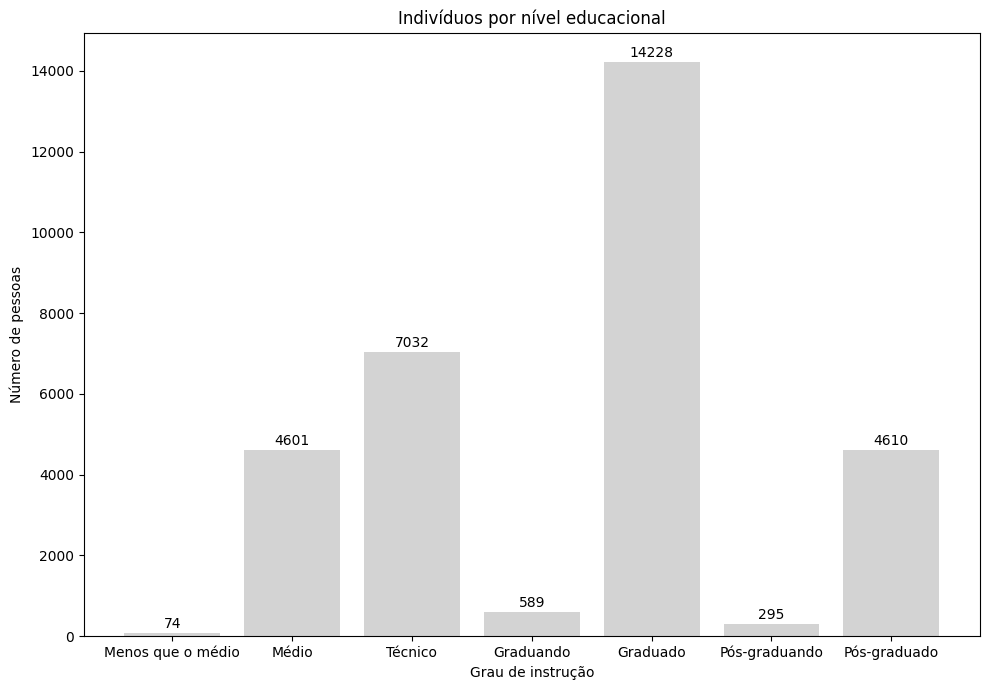

In [ ]:
import matplotlib.pyplot as plt

# Dados
educacao_counts = [74, 4601, 7032, 589, 14228, 295, 4610]
educacao_labels = ['Menos que o médio', 'Médio', 'Técnico', 'Graduando', 'Graduado', 'Pós-graduando', 'Pós-graduado']
cores = ['lightgrey']

# Criando o gráfico de barras
plt.figure(figsize=(10, 7))
bars = plt.bar(educacao_labels, educacao_counts, color=cores)

# Adicionando números sobre as barras
for bar, count in zip(bars, educacao_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, count,
             ha='center', va='bottom')

# Adicionando título e rótulos dos eixos
plt.title('Indivíduos por nível educacional')
plt.xlabel('Grau de instrução')
plt.ylabel('Número de pessoas')

# Rotacionando os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=0)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


**Reclassificação dos graus de educação**

In [ ]:
import pandas as pd

# Dados para a tabela
data_tcc = {
    'Grau de educação': ['0', '0', 'Menos que o ensino médio', 'Menos que o ensino médio', 'Médio', 'Médio', 'Graduação', 'Graduação', 'Pós-graduação', 'Pós-graduação'],
    'Escrita na área de formação': ['0', 'Sim', '0', 'Sim', '0', 'Sim', '0', 'Sim', '0', 'Sim'],
    'Classificação do grau de educação': ['Menos que o ensino médio', 'Técnico', 'Menos que o ensino médio', 'Técnico', 'Médio', 'Técnico', 'Não graduado', 'Graduado', 'Sem pós-graduação', 'Pós-graduado'],
    'Formação': ['Sem formação', 'Com formação', 'Sem formação', 'Com formação', 'Sem formação', 'Com formação', 'Sem formação', 'Com formação', 'Sem formação', 'Com formação'],
    'Contagem no banco de dados': ['0', '1', '0', '1', '0', '1', '0', '1', '0', '1']
}

# Criando o DataFrame
df = pd.DataFrame(data_tcc)

# Exibindo a tabela no Jupyter Notebook
df


,Grau de educação,Escrita na área de formação,Classificação do grau de educação,Formação,Contagem no banco de dados
0,0,0,Menos que o ensino médio,Sem formação,0
1,0,Sim,Técnico,Com formação,1
2,Menos que o ensino médio,0,Menos que o ensino médio,Sem formação,0
3,Menos que o ensino médio,Sim,Técnico,Com formação,1
4,Médio,0,Médio,Sem formação,0
5,Médio,Sim,Técnico,Com formação,1
6,Graduação,0,Não graduado,Sem formação,0
7,Graduação,Sim,Graduado,Com formação,1
8,Pós-graduação,0,Sem pós-graduação,Sem formação,0
9,Pós-graduação,Sim,Pós-graduado,Com formação,1


**Variável localidade**

In [ ]:
data['local'].value_counts()

local
Urbano (vila, cidade)    14061
Suburbano                10588
Rural (campo)             7112
Name: count, dtype: int64

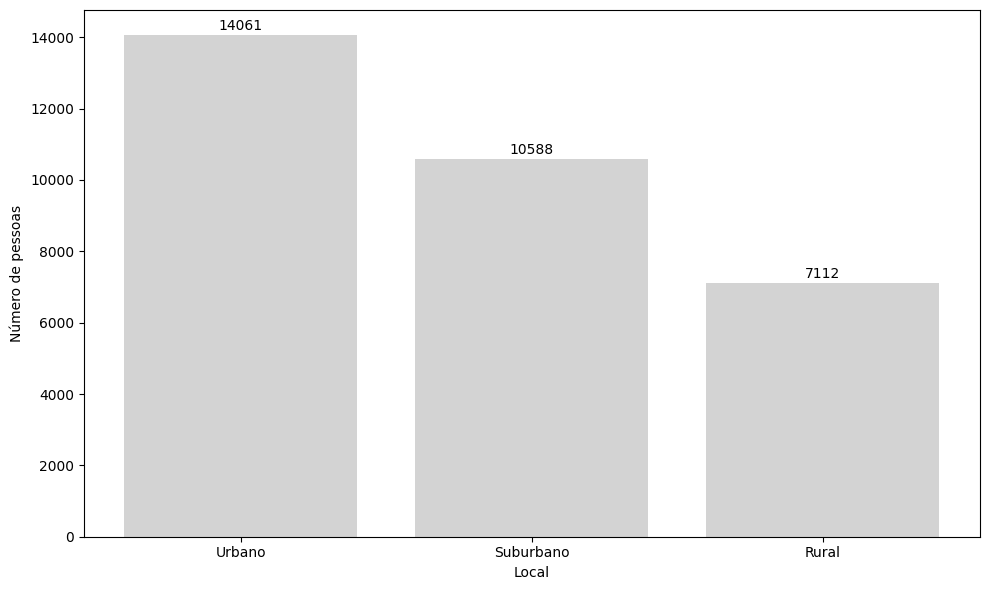

In [ ]:
import matplotlib.pyplot as plt

# Dados
local_counts = [14061, 10588, 7112]
local_labels = ['Urbano', 'Suburbano', 'Rural']
cores = ['lightgrey']

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(local_labels, local_counts, color=cores)

# Adicionando números sobre as barras
for bar, count in zip(bars, local_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, count,
             ha='center', va='bottom')

# Adicionando título e rótulos dos eixos
plt.xlabel('Local')
plt.ylabel('Número de pessoas')

# Rotacionando os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=0)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


**Variável estado civil**

In [ ]:
data['estado civil'].value_counts()

estado civil
Nunca casado            26455
Casado atualmente        4256
Casado anteriormente     1050
Name: count, dtype: int64

Reorganaizando os nomes variáveis:


*   Nunca casado: Solteiro
*   Casado atualmente: casado
*   Casado anteriomente: Divorciado ou viúvo



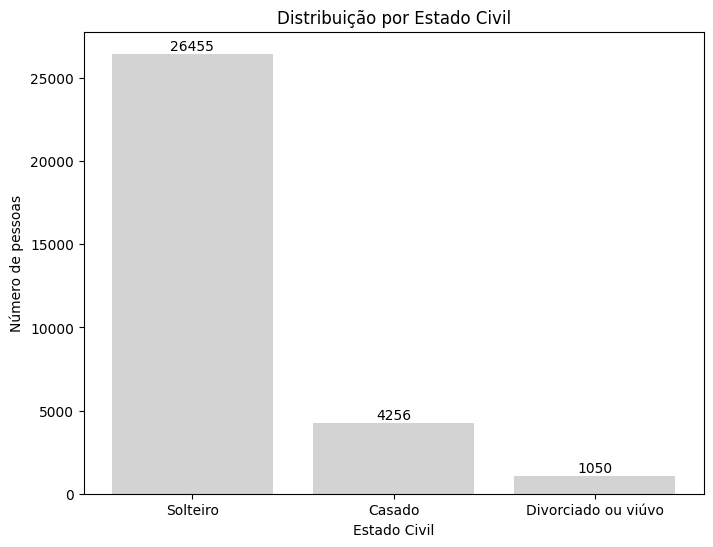

In [ ]:
import matplotlib.pyplot as plt

# Dados
estado_civil = ['Solteiro', 'Casado', 'Divorciado ou viúvo']
quantidades = [26455, 4256, 1050]

# Criar gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(estado_civil, quantidades, color=['lightgray'])

# Adicionar números sobre as barras
for bar, quantidade in zip(bars, quantidades):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, quantidade,
             ha='center', va='bottom')

# Adicionar rótulos e título
plt.xlabel('Estado Civil')
plt.ylabel('Número de pessoas')
plt.title('Distribuição por Estado Civil')

# Exibir o gráfico
plt.show()


**Variável formação**

In [ ]:
data["formacao"].value_counts()

formacao
Com formação    25870
Sem formação     5891
Name: count, dtype: int64

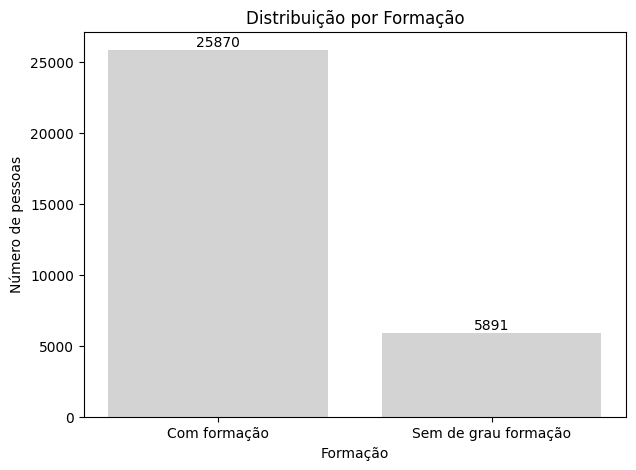

In [ ]:
import matplotlib.pyplot as plt

# Dados
formacao = ['Com formação', 'Sem de grau formação']
quantidades = [25870, 5891]

# Criar gráfico de barras
plt.figure(figsize=(7, 5))
bars = plt.bar(formacao, quantidades, color=['lightgrey'])

# Adicionar números sobre as barras
for bar, quantidade in zip(bars, quantidades):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, quantidade,
             ha='center', va='bottom')

# Adicionar rótulos e título
plt.xlabel('Formação')
plt.ylabel('Número de pessoas')
plt.title('Distribuição por Formação')

# Exibir o gráfico
plt.show()


**Áreas de formação**

In [ ]:
# Obtendo os valores únicos da coluna "area_formacao"
valores_area_formacao = data["area_formacao"].unique()

# Iterando sobre cada valor único e imprimindo a contagem
for area_formacao in valores_area_formacao:
    contagem = data[data["area_formacao"] == area_formacao].shape[0]
    print(f"Área de Formação: {area_formacao}, Contagem: {contagem}")

Área de Formação: psicologia, Contagem: 1866
Área de Formação: 0, Contagem: 5891
Área de Formação: artes e design, Contagem: 1217
Área de Formação: computacao, Contagem: 1198
Área de Formação: biologicas, Contagem: 843
Área de Formação: criminologia, Contagem: 95
Área de Formação: negocios, Contagem: 2515
Área de Formação: engenharia, Contagem: 3463
Área de Formação: ensino, Contagem: 815
Área de Formação: ciencias humanas, Contagem: 659
Área de Formação: tecnologia, Contagem: 2627
Área de Formação: arquitetura, Contagem: 416
Área de Formação: medicina, Contagem: 1437
Área de Formação: linguagens, Contagem: 1845
Área de Formação: contabilidade, Contagem: 1247
Área de Formação: saude, Contagem: 1580
Área de Formação: gastronomia, Contagem: 335
Área de Formação: ciencias, Contagem: 851
Área de Formação: financas, Contagem: 476
Área de Formação: relações públicas, Contagem: 87
Área de Formação: economia, Contagem: 401
Área de Formação: fisica, Contagem: 220
Área de Formação: matemática, C

**Criando tabelas por áreas agrupadas**

In [ ]:
from collections import defaultdict

# Dados fornecidos
dados = {
    "Exatas e Naturezas": [
        "Área de Formação: computacao, Contagem: 1198",
        "Área de Formação: engenharia, Contagem: 3463",
        "Área de Formação: tecnologia, Contagem: 2627",
        "Área de Formação: ciencias, Contagem: 851",
        "Área de Formação: fisica, Contagem: 220",
        "Área de Formação: matemática, Contagem: 411",
        "Área de Formação: química, Contagem: 277"
    ],
    "Humanas": [
        "Área de Formação: artes e design, Contagem: 1217",
        "Área de Formação: ensino, Contagem: 815",
        "Área de Formação: ciencias humanas, Contagem: 659",
        "Área de Formação: arquitetura, Contagem: 416",
        "Área de Formação: linguagens, Contagem: 1845",
        "Área de Formação: relações públicas, Contagem: 87",
        "Área de Formação: ciencias sociais, Contagem: 160",
        "Área de Formação: jornalismo, Contagem: 91",
        "Área de Formação: direito, Contagem: 9",
        "Área de Formação: ciencias humanas , Contagem: 74",
        "Área de Formação: turismo, Contagem: 205",
        "Área de Formação: administração, Contagem: 352"
    ],
    "Saúde e biologicas": [
        "Área de Formação: psicologia, Contagem: 1866",
        "Área de Formação: biologicas, Contagem: 843",
        "Área de Formação: medicina, Contagem: 1437",
        "Área de Formação: saude, Contagem: 1580"
    ],
    "Finanças": [
        "Área de Formação: negocios, Contagem: 2515",
        "Área de Formação: contabilidade, Contagem: 1247",
        "Área de Formação: financas, Contagem: 476",
        "Área de Formação: economia, Contagem: 401"
    ],
    "Sem formação": [
        "Área de Formação: 0, Contagem: 5891"
    ],
    "OUTROS": [
        "Área de Formação: criminologia, Contagem: 95",
        "Área de Formação: gastronomia, Contagem: 335",
        "Área de Formação: criminologia , Contagem: 20",
        "Área de Formação: policial, Contagem: 17",
        "Área de Formação: agricultura, Contagem: 61"
    ]
}

# Dicionário para armazenar as contagens por grupo
contagens = defaultdict(list)

# Processamento dos dados
for grupo, areas in dados.items():
    for dado in areas:
        area, contagem = dado.split(", Contagem: ")
        contagens[grupo].append((area.split(": ")[1], int(contagem)))

# Função para imprimir a tabela
def imprimir_tabela(titulo, dados):
    print(f"{titulo}:")
    print("+--------------+-----------+")
    print("|   Área       | Contagem  |")
    print("+--------------+-----------+")
    for area, contagem in dados:
        print(f"| {area.ljust(13)} | {str(contagem).rjust(9)} |")
    print("+--------------+-----------+")

# Impressão das tabelas
for grupo, dados in contagens.items():
    imprimir_tabela(grupo, dados)
    print()

Exatas e Naturezas:
+--------------+-----------+
|   Área       | Contagem  |
+--------------+-----------+
| computacao    |      1198 |
| engenharia    |      3463 |
| tecnologia    |      2627 |
| ciencias      |       851 |
| fisica        |       220 |
| matemática    |       411 |
| química       |       277 |
+--------------+-----------+

Humanas:
+--------------+-----------+
|   Área       | Contagem  |
+--------------+-----------+
| artes e design |      1217 |
| ensino        |       815 |
| ciencias humanas |       659 |
| arquitetura   |       416 |
| linguagens    |      1845 |
| relações públicas |        87 |
| ciencias sociais |       160 |
| jornalismo    |        91 |
| direito       |         9 |
| ciencias humanas  |        74 |
| turismo       |       205 |
| administração |       352 |
+--------------+-----------+

Saúde e biologicas:
+--------------+-----------+
|   Área       | Contagem  |
+--------------+-----------+
| psicologia    |      1866 |
| biologicas   

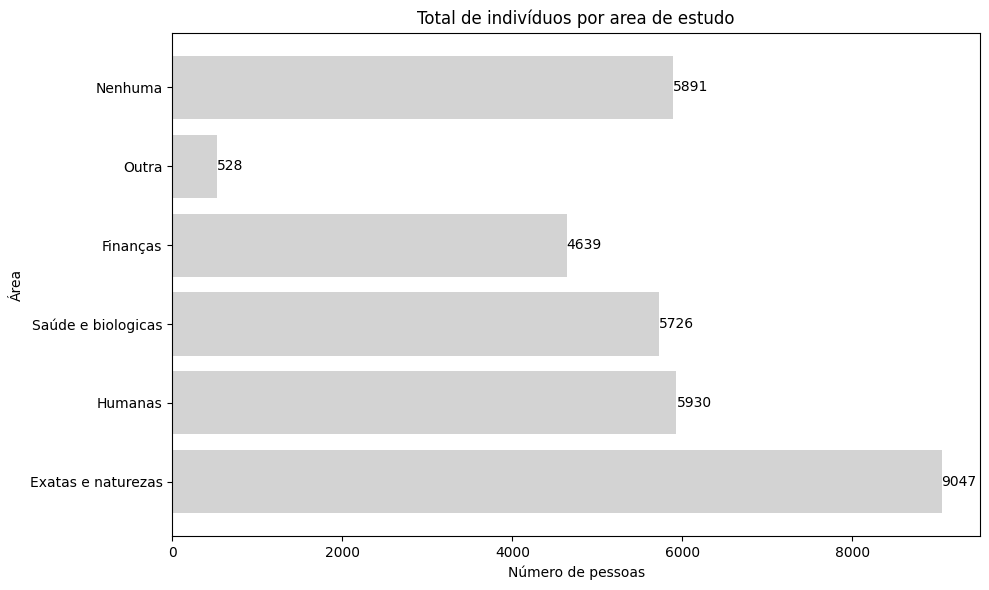

In [ ]:
import matplotlib.pyplot as plt

# Dados
areas = ['Exatas e naturezas', 'Humanas', 'Saúde e biologicas','Finanças', 'Outra','Nenhuma']
totais = [9047, 5930, 5726, 4639, 528,5891]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.barh(areas, totais, color='lightgray')

# Adicionar o valor de cada barra
for bar, total in zip(bars, totais):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{total}',
             va='center', ha='left')

# Adicionar rótulos e título
plt.xlabel('Número de pessoas')
plt.ylabel('Área')
plt.title('Total de indivíduos por area de estudo')

# Mostrar o gráfico
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Dicionário de mapeamento de áreas específicas para grandes áreas
mapeamento_areas = {
    "computacao": "Exatas e Naturezas",
    "engenharia": "Exatas e Naturezas",
    "tecnologia": "Exatas e Naturezas",
    "ciencias": "Exatas e Naturezas",
    "fisica": "Exatas e Naturezas",
    "matemática": "Exatas e Naturezas",
    "química": "Exatas e Naturezas",
    "artes e design": "Humanas",
    "ensino": "Humanas",
    "ciencias_humanas": "Humanas",
    "arquitetura": "Humanas",
    "linguagens": "Humanas",
    "relações públicas": "Humanas",
    "ciencias sociais": "Humanas",
    "jornalismo": "Humanas",
    "direito": "Humanas",
    "turismo": "Humanas",
    "administração": "Humanas",
    "psicologia": "Saúde e biologicas",
    "biologicas": "Saúde e biologicas",
    "medicina": "Saúde e biologicas",
    "saude": "Saúde e biologicas",
    "negocios": "Finanças",
    "contabilidade": "Finanças",
    "financas": "Finanças",
    "economia": "Finanças",
    "0": "Sem formação",
    "criminologia": "Outros",
    "gastronomia": "Outros",
    "policial": "Outros",
    "agricultura": "Outros"
}

# Função para adicionar a nova coluna "grandes_areas" aos dados
def adicionar_grandes_areas(data):
    data['grandes_areas'] = data['area_formacao'].apply(lambda x: mapeamento_areas.get(str(x).split(': ')[0], 'Outros'))
    return data

# Carregar os dados do arquivo Excel
data = pd.read_excel('DB_TCC_FINAL.xlsx')

# Adicionar a nova coluna "grandes_areas" aos dados
data = adicionar_grandes_areas(data)

# Exibir o DataFrame com a nova coluna
print(data.head())


                  educacao                  local  genero  idade  \
0  Graduação universitária              Suburbano  Mulher     19   
1             Ensino médio  Urbano (vila, cidade)  Mulher     20   
2            Pós-graduação              Suburbano  Mulher     29   
3   Menos que ensino médio          Rural (campo)  Mulher     18   
4             Ensino médio          Rural (campo)  Mulher     18   

   estado civil  número de filhos   area_formacao      formacao  \
0  Nunca casado                 4      psicologia  Com formação   
1  Nunca casado                 4               0  Sem formação   
2  Nunca casado                 2  artes e design  Com formação   
3  Nunca casado                 3      computacao  Com formação   
4  Nunca casado                 2               0  Sem formação   

        nivel_ansiedae      nivel_depressao       nivel_estresse estresse  \
0  Extremamente Severo  Extremamente Severo  Extremamente Severo      Sim   
1  Extremamente Severo            

## **Gráficos para cada área  de formação**

# **Exatas**

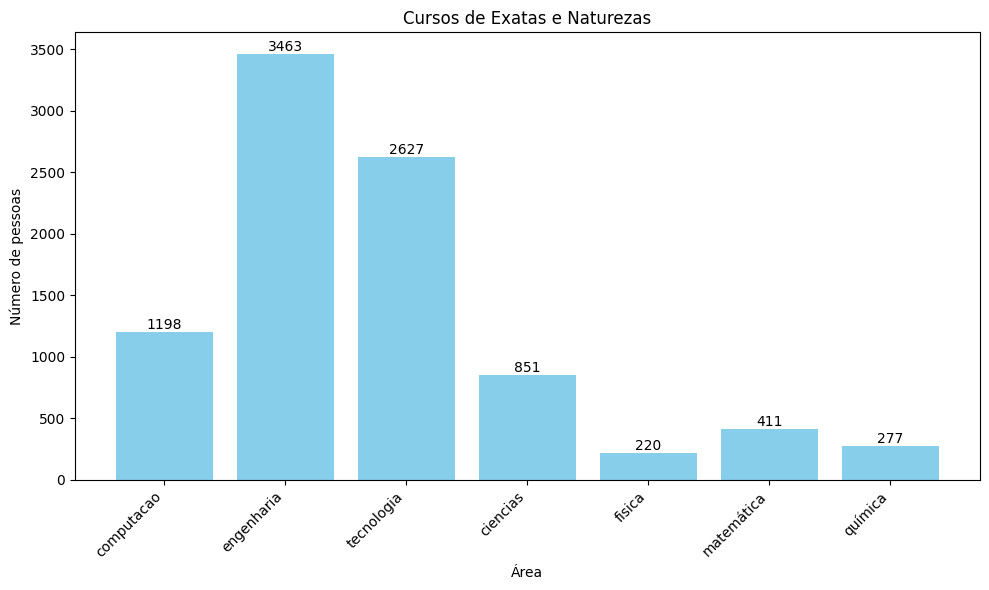

In [ ]:
import matplotlib.pyplot as plt

# Dados
areas = ["computacao", "engenharia", "tecnologia", "ciencias", "fisica", "matemática", "química"]
contagens = [1198, 3463, 2627, 851, 220, 411, 277]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(areas, contagens, color='skyblue')

# Adicionar os valores em cima de cada barra
for i in range(len(areas)):
    plt.text(i, contagens[i], str(contagens[i]), ha='center', va='bottom')

# Adicionar título e rótulos dos eixos
plt.title('Cursos de Exatas e Naturezas')
plt.xlabel('Área')
plt.ylabel('Número de pessoas')

# Mostrar o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Humanas**

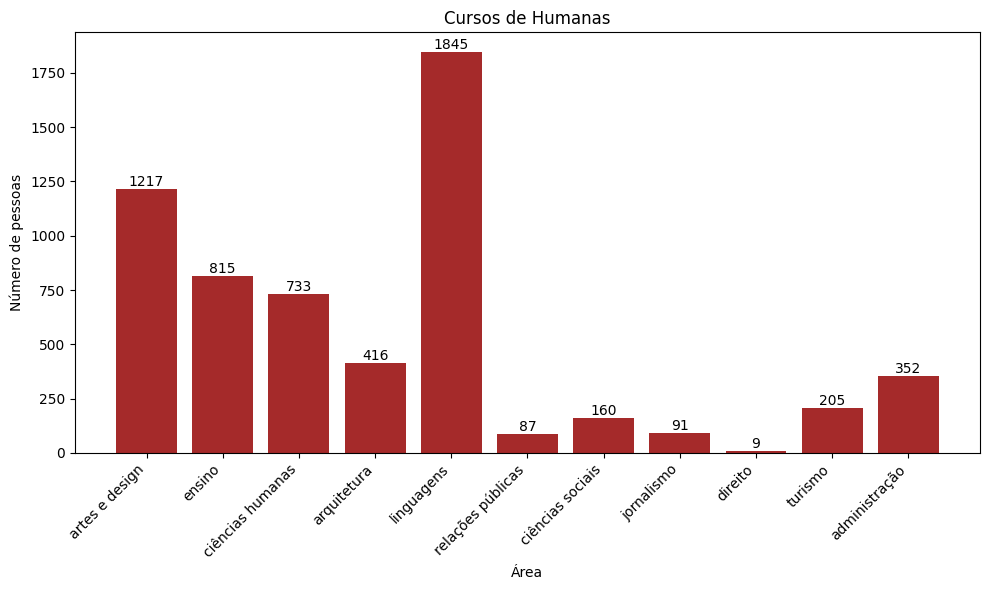

In [ ]:
import matplotlib.pyplot as plt

# Dados
areas_humanas = ["artes e design", "ensino", "ciências humanas", "arquitetura", "linguagens",
                 "relações públicas", "ciências sociais", "jornalismo", "direito",
                 "turismo", "administração"]  # Removi o elemento "ciências humanas " duplicado
contagens_humanas = [1217, 815, 733, 416, 1845, 87, 160, 91, 9, 205, 352]  # Adicionei um elemento extra

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(areas_humanas, contagens_humanas, color='brown')

# Adicionar os valores em cima de cada barra
for i in range(len(areas_humanas)):
    plt.text(i, contagens_humanas[i], str(contagens_humanas[i]), ha='center', va='bottom')

# Adicionar título e rótulos dos eixos
plt.title('Cursos de Humanas')
plt.xlabel('Área')
plt.ylabel('Número de pessoas')

# Mostrar o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Saúde e biologicas**

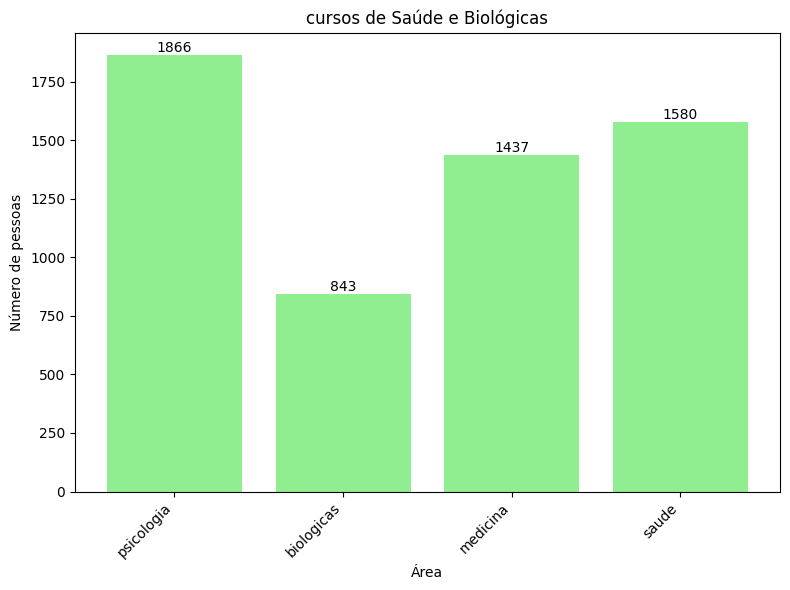

In [ ]:
import matplotlib.pyplot as plt

# Dados
areas_saude_biologicas = ["psicologia", "biologicas", "medicina", "saude"]
contagens_saude_biologicas = [1866, 843, 1437, 1580]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(areas_saude_biologicas, contagens_saude_biologicas, color='lightgreen')

# Adicionar os valores em cima de cada barra
for i in range(len(areas_saude_biologicas)):
    plt.text(i, contagens_saude_biologicas[i], str(contagens_saude_biologicas[i]), ha='center', va='bottom')

# Adicionar título e rótulos dos eixos
plt.title('cursos de Saúde e Biológicas')
plt.xlabel('Área')
plt.ylabel('Número de pessoas')

# Mostrar o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Finanças**

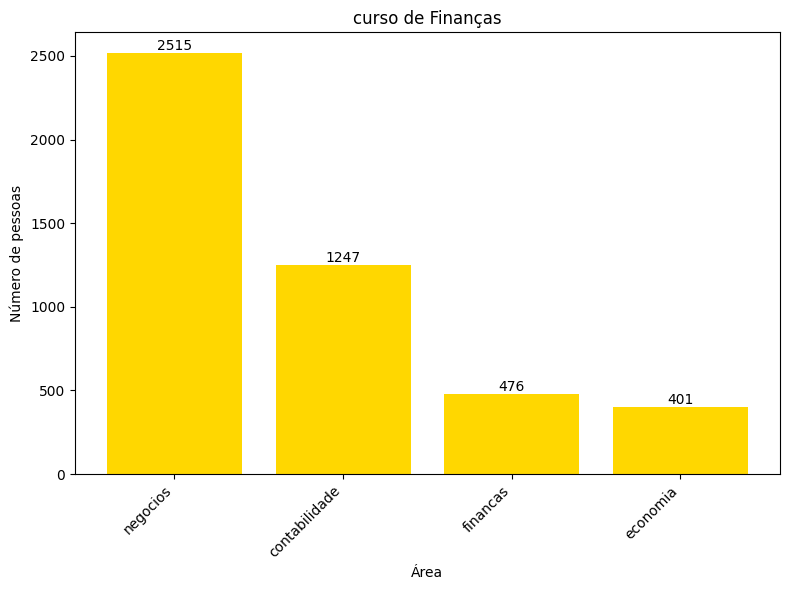

In [ ]:
import matplotlib.pyplot as plt

# Dados
areas_financas = ["negocios", "contabilidade", "financas", "economia"]
contagens_financas = [2515, 1247, 476, 401]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(areas_financas, contagens_financas, color='gold')

# Adicionar os valores em cima de cada barra
for i in range(len(areas_financas)):
    plt.text(i, contagens_financas[i], str(contagens_financas[i]), ha='center', va='bottom')

# Adicionar título e rótulos dos eixos
plt.title('curso de Finanças')
plt.xlabel('Área')
plt.ylabel('Número de pessoas')

# Mostrar o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Outros**

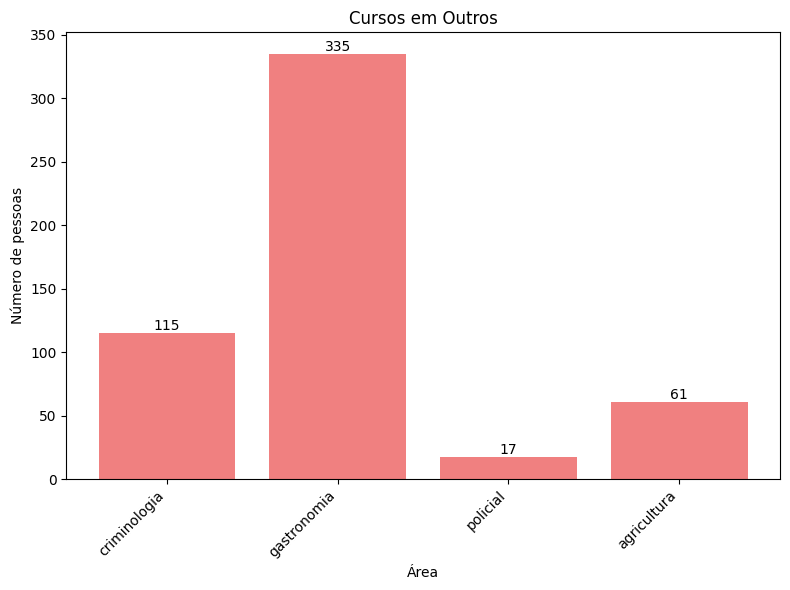

In [ ]:
import matplotlib.pyplot as plt

# Dados
areas_outros = ["criminologia", "gastronomia", "policial", "agricultura"]
contagens_outros = [115, 335, 17, 61]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(areas_outros, contagens_outros, color='lightcoral')

# Adicionar os valores em cima de cada barra
for i in range(len(areas_outros)):
    plt.text(i, contagens_outros[i], str(contagens_outros[i]), ha='center', va='bottom')

# Adicionar título e rótulos dos eixos
plt.title('Cursos em Outros')
plt.xlabel('Área')
plt.ylabel('Número de pessoas')

# Mostrar o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Variável gênero**

In [ ]:
data_genero = data[['genero']].copy()
data_genero = pd.get_dummies(data_genero, columns=['genero'], prefix='genero', prefix_sep='_')
data_genero.rename(columns={'genero_1': 'genero_homem', 'genero_2': 'genero_mulher'}, inplace=True)

In [ ]:
genero_counts = data_genero.filter(like='genero_').sum()
genero_counts

genero_Homem      7256
genero_Mulher    24505
dtype: int64

In [ ]:
genero_counts_table = pd.DataFrame({'genero': ['Homens', 'Mulheres'],
                                    'Quantidade': [genero_counts['genero_Homem'], genero_counts['genero_Mulher']]})

genero_counts_table.reset_index(drop=True, inplace=True)
genero_counts_table


,genero,Quantidade
0,Homens,7256
1,Mulheres,24505


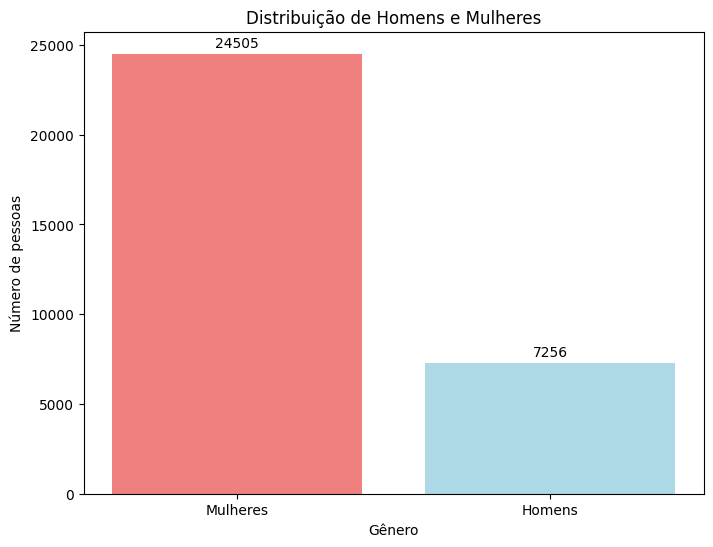

In [ ]:
from re import M
import matplotlib.pyplot as plt

# Dados fornecidos
Mulher = 24505
Homem = 7256

# Criando uma lista com os rótulos
generos = ['Mulheres', 'Homens']

# Criando uma lista com os dados
quantidades = [Mulher, Homem]

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(generos, quantidades, color=['lightcoral', 'lightblue'])

# Adicionando as quantidades no topo das barras
for bar, quantidade in zip(bars, quantidades):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 200, quantidade,
             ha='center', va='bottom')

# Adicionando rótulos e título
plt.xlabel('Gênero')
plt.ylabel('Número de pessoas')
plt.title('Distribuição de Homens e Mulheres')

# Exibindo o gráfico
plt.show()


# **Variável idade**

In [ ]:
idade_tamanho = [0, 21, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 200]
idade_labels = ['18-21', '22-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '70+']
data_idade = pd.DataFrame({'idade_group': pd.cut(data['idade'].values, bins=idade_tamanho, labels=idade_labels, duplicates='drop')})
data_idade = pd.get_dummies(data_idade, columns=['idade_group'], prefix='idade', prefix_sep='_')

In [ ]:
idade_counts = data_idade.filter(like='idade_').sum()
idade_counts_table = pd.DataFrame({'Faixa Etária': idade_labels, 'Quantidade': idade_counts.values})
idade_counts_table.reset_index(drop=True, inplace=True)

idade_counts_table

,Faixa Etária,Quantidade
0,18-21,13543
1,22-25,8975
2,26-30,4273
3,31-35,1816
4,36-40,1029
5,41-45,659
6,46-50,558
7,51-55,416
8,56-60,252
9,61-65,136


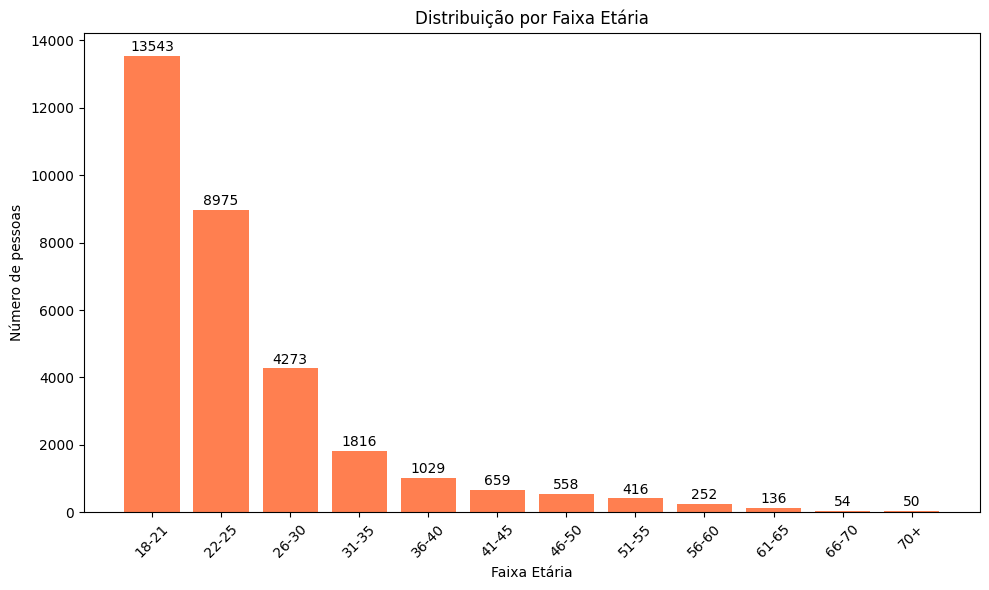

In [ ]:
import matplotlib.pyplot as plt

# Dados
faixas_etarias = ['18-21', '22-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '70+']
quantidades = [13543, 8975, 4273, 1816, 1029, 659, 558, 416, 252, 136, 54, 50]

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(faixas_etarias, quantidades, color='coral')

# Adicionando números sobre as barras
for i in range(len(faixas_etarias)):
    plt.text(i, quantidades[i] + 50, str(quantidades[i]), ha='center', va='bottom')

# Adicionando título e rótulos dos eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Número de pessoas')
plt.title('Distribuição por Faixa Etária')

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Homens e mulheres por faixa-etaria**

In [ ]:
# Combinando os DataFrames data_age e data_gender
data_combined = pd.concat([data_idade, data_genero], axis=1)

# Calculando a quantidade de homens e mulheres por faixa etária
genero_idade_counts_1 = data_combined.groupby(['idade_18-21', 'genero_Homem']).count()
genero_idade_counts_2 = data_combined.groupby(['idade_22-25', 'genero_Homem']).count()
genero_idade_counts_3 = data_combined.groupby(['idade_26-30', 'genero_Homem']).count()
genero_idade_counts_4 = data_combined.groupby(['idade_31-35', 'genero_Homem']).count()
genero_idade_counts_5 = data_combined.groupby(['idade_36-40', 'genero_Homem']).count()
genero_idade_counts_6 = data_combined.groupby(['idade_41-45', 'genero_Homem']).count()
genero_idade_counts_7 = data_combined.groupby(['idade_46-50', 'genero_Homem']).count()
genero_idade_counts_8 = data_combined.groupby(['idade_51-55', 'genero_Homem']).count()
genero_idade_counts_9 = data_combined.groupby(['idade_56-60', 'genero_Homem']).count()
genero_idade_counts_10 = data_combined.groupby(['idade_61-65', 'genero_Homem']).count()
genero_idade_counts_11 = data_combined.groupby(['idade_66-70', 'genero_Homem']).count()
genero_idade_counts_12 = data_combined.groupby(['idade_70+', 'genero_Homem']).count()

Homens = [
          genero_idade_counts_1.loc[(True, True)].iloc[0],
          genero_idade_counts_2.loc[(True, True)].iloc[0],
          genero_idade_counts_3.loc[(True, True)].iloc[0],
          genero_idade_counts_4.loc[(True, True)].iloc[0],
          genero_idade_counts_5.loc[(True, True)].iloc[0],
          genero_idade_counts_6.loc[(True, True)].iloc[0],
          genero_idade_counts_7.loc[(True, True)].iloc[0],
          genero_idade_counts_8.loc[(True, True)].iloc[0],
          genero_idade_counts_9.loc[(True, True)].iloc[0],
          genero_idade_counts_10.loc[(True, True)].iloc[0],
          genero_idade_counts_11.loc[(True, True)].iloc[0],
          genero_idade_counts_12.loc[(True, True)].iloc[0]
]

Mulheres = [
          genero_idade_counts_1.loc[(True, False)].iloc[0],
          genero_idade_counts_2.loc[(True, False)].iloc[0],
          genero_idade_counts_3.loc[(True, False)].iloc[0],
          genero_idade_counts_4.loc[(True, False)].iloc[0],
          genero_idade_counts_5.loc[(True, False)].iloc[0],
          genero_idade_counts_6.loc[(True, False)].iloc[0],
          genero_idade_counts_7.loc[(True, False)].iloc[0],
          genero_idade_counts_8.loc[(True, False)].iloc[0],
          genero_idade_counts_9.loc[(True, False)].iloc[0],
          genero_idade_counts_10.loc[(True, False)].iloc[0],
          genero_idade_counts_11.loc[(True, False)].iloc[0],
          genero_idade_counts_12.loc[(True, False)].iloc[0]
]

# Criando um DataFrame com os resultados
faixas_etarias = ['18-21', '22-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '70+']

genero_idade_counts_tabela = pd.DataFrame({'Faixa Etária': faixas_etarias,
                                           'Homens': Homens,
                                           'Mulheres': Mulheres
                                          })

genero_idade_counts_tabela.reset_index(drop=True, inplace=True)
genero_idade_counts_tabela


,Faixa Etária,Homens,Mulheres
0,18-21,2782,10761
1,22-25,1870,7105
2,26-30,1040,3233
3,31-35,484,1332
4,36-40,302,727
5,41-45,202,457
6,46-50,187,371
7,51-55,159,257
8,56-60,108,144
9,61-65,66,70


# **Interpretação**


#### Distribuição por Faixa Etária:
- A maioria das pessoas está concentrada nas faixas etárias entre 18-21 e 22-25 anos, com 13.543 e 8.975 pessoas, respectivamente.
- À medida que a faixa etária aumenta, o número de pessoas diminui gradualmente, indicando uma diminuição na população à medida que as pessoas envelhecem.

#### Distribuição de Gênero por Faixa Etária:
- Para todas as faixas etárias, exceto 61-65 anos e 66-70 anos, há mais mulheres do que homens.
- Nas faixas etárias mais jovens (18-21, 22-25, 26-30), a diferença entre o número de mulheres e homens é significativamente maior.
- Nas faixas etárias mais velhas (61-65, 66-70, 70+), a diferença diminui, e em algumas faixas etárias, como 66-70 e 70+, o número de homens é ligeiramente maior que o número de mulheres.

### Conclusões:
- A maioria das pessoas está concentrada nas faixas etárias mais jovens, entre 18 e 25 anos.
- A distribuição de gênero varia de acordo com a faixa etária, com mais mulheres do que homens na maioria das faixas etárias, especialmente nas faixas etárias mais jovens.
- A maioria das pessoas do conjunto de dados é composta por mulheres.

# **Formados e não formados por gênero**

In [ ]:
# Contagens de formados e não formados para homens
formados_homens = data[(data['genero'] == 'Homem') & (data['formacao'] == 'Com formação')].shape[0]
nao_formados_homens = data[(data['genero'] == 'Homem') & (data['formacao'] == 'Sem formação')].shape[0]

# Contagens de formadas e não formadas para mulheres
formadas_mulheres = data[(data['genero'] == 'Mulher') & (data['formacao'] == 'Com formação')].shape[0]
nao_formadas_mulheres = data[(data['genero'] == 'Mulher') & (data['formacao'] == 'Sem formação')].shape[0]

# Criando um DataFrame com os resultados
resultado = pd.DataFrame({
    'Formados_Homens': [formados_homens],
    'Nao_Formados_Homens': [nao_formados_homens],
    'Formadas_Mulheres': [formadas_mulheres],
    'Nao_Formadas_Mulheres': [nao_formadas_mulheres]
})

resultado


,Formados_Homens,Nao_Formados_Homens,Formadas_Mulheres,Nao_Formadas_Mulheres
0,5451,1805,20419,4086


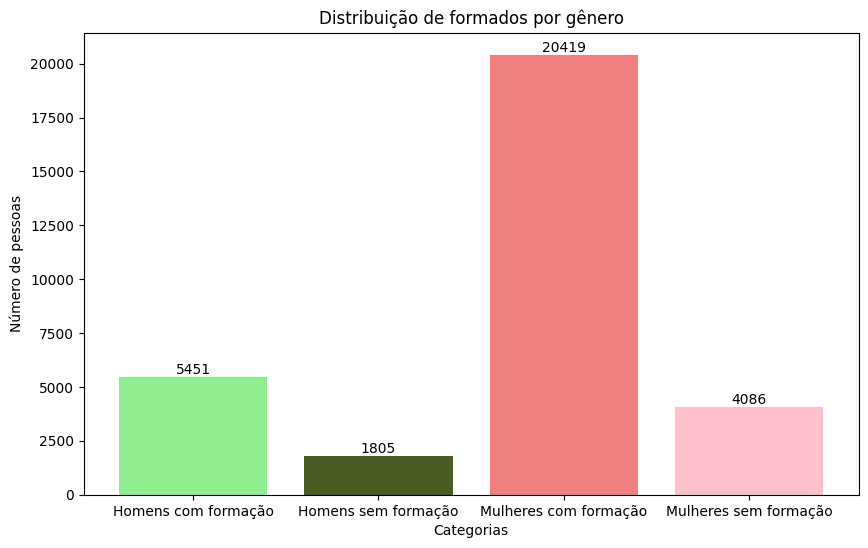

In [ ]:
import matplotlib.pyplot as plt

# Dados
categorias = ['Homens com formação', 'Homens sem formação', 'Mulheres com formação', 'Mulheres sem formação']
quantidades = [5451, 1805, 20419, 4086]

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
barras = plt.bar(categorias, quantidades, color=['lightgreen', '#4A5D23', 'lightcoral', 'pink'])

# Adicionar rótulos e título
plt.title('Distribuição de formados por gênero')
plt.xlabel('Categorias')
plt.ylabel('Número de pessoas')

# Adicionar quantidades no topo das barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura}', ha='center', va='bottom')

# Exibir o gráfico
plt.show()


# **Formados e não formados por gênero e faixa-etaria**

In [ ]:
#Criando dataframe de formação
data_formacao = data['formacao'].copy()

#Combinando dataframe de idade, genero e formação
data_combined_formacao = data_combined = pd.concat([data_idade, data_genero, data_formacao], axis=1)

# Calculando a quantidade de homens e mulheres por faixa etária com e sem formação
genero_idade_formacao_counts_1 = data_combined.groupby(['idade_18-21', 'genero_Homem', 'formacao']).count()
genero_idade_formacao_counts_2 = data_combined.groupby(['idade_22-25', 'genero_Homem', 'formacao']).count()
genero_idade_formacao_counts_3 = data_combined.groupby(['idade_26-30', 'genero_Homem', 'formacao']).count()
genero_idade_formacao_counts_4 = data_combined.groupby(['idade_31-35', 'genero_Homem','formacao']).count()
genero_idade_formacao_counts_5 = data_combined.groupby(['idade_36-40', 'genero_Homem', 'formacao']).count()
genero_idade_formacao_counts_6 = data_combined.groupby(['idade_41-45', 'genero_Homem', 'formacao']).count()
genero_idade_formacao_counts_7 = data_combined.groupby(['idade_46-50', 'genero_Homem', 'formacao']).count()
genero_idade_formacao_counts_8 = data_combined.groupby(['idade_51-55', 'genero_Homem', 'formacao']).count()
genero_idade_formacao_counts_9 = data_combined.groupby(['idade_56-60', 'genero_Homem', 'formacao']).count()
genero_idade_formacao_counts_10 = data_combined.groupby(['idade_61-65', 'genero_Homem', 'formacao']).count()
genero_idade_formacao_counts_11 = data_combined.groupby(['idade_66-70', 'genero_Homem', 'formacao']).count()
genero_idade_formacao_counts_12 = data_combined.groupby(['idade_70+', 'genero_Homem', 'formacao']).count()

Homens_formados = [
          genero_idade_formacao_counts_1.loc[(True, True, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_2.loc[(True, True, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_3.loc[(True, True, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_4.loc[(True, True, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_5.loc[(True, True, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_6.loc[(True, True, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_7.loc[(True, True, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_8.loc[(True, True, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_9.loc[(True, True, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_10.loc[(True, True, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_11.loc[(True, True, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_12.loc[(True, True, 'Com formação')].iloc[0]
]

Homens_sem_formacao = [
          genero_idade_formacao_counts_1.loc[(True, True, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_2.loc[(True, True, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_3.loc[(True, True, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_4.loc[(True, True, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_5.loc[(True, True, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_6.loc[(True, True, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_7.loc[(True, True, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_8.loc[(True, True, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_9.loc[(True, True, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_10.loc[(True, True, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_11.loc[(True, True, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_12.loc[(True, True, 'Sem formação')].iloc[0]
]

Mulheres_formadas = [
          genero_idade_formacao_counts_1.loc[(True, False, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_2.loc[(True, False, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_3.loc[(True, False, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_4.loc[(True, False, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_5.loc[(True, False, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_6.loc[(True, False, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_7.loc[(True, False, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_8.loc[(True, False, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_9.loc[(True, False, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_10.loc[(True, False, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_11.loc[(True, False, 'Com formação')].iloc[0],
          genero_idade_formacao_counts_12.loc[(True, False, 'Com formação')].iloc[0]
]

Mulheres_sem_formacao = [
          genero_idade_formacao_counts_1.loc[(True, False, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_2.loc[(True, False, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_3.loc[(True, False, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_4.loc[(True, False, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_5.loc[(True, False, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_6.loc[(True, False, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_7.loc[(True, False, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_8.loc[(True, False, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_9.loc[(True, False, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_10.loc[(True, False, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_11.loc[(True, False, 'Sem formação')].iloc[0],
          genero_idade_formacao_counts_12.loc[(True, False, 'Sem formação')].iloc[0]
]

# Criando um DataFrame com os resultados

genero_idade_formacao_counts_tabela = pd.DataFrame({'Faixa Etária': faixas_etarias,
                                           'Homens Formados': Homens_formados,
                                           'Homens sem formação': Homens_sem_formacao,
                                           'Mulheres Formadas': Mulheres_formadas,
                                           'Mulheres sem formação': Mulheres_sem_formacao
                                          })

genero_idade_formacao_counts_tabela.reset_index(drop=True, inplace=True)
genero_idade_formacao_counts_tabela


,Faixa Etária,Homens Formados,Homens sem formação,Mulheres Formadas,Mulheres sem formação
0,18-21,1921,861,8654,2107
1,22-25,1579,291,6407,698
2,26-30,849,191,2814,419
3,31-35,373,111,1078,254
4,36-40,205,97,558,169
5,41-45,144,58,325,132
6,46-50,122,65,250,121
7,51-55,107,52,168,89
8,56-60,73,35,89,55
9,61-65,41,25,44,26


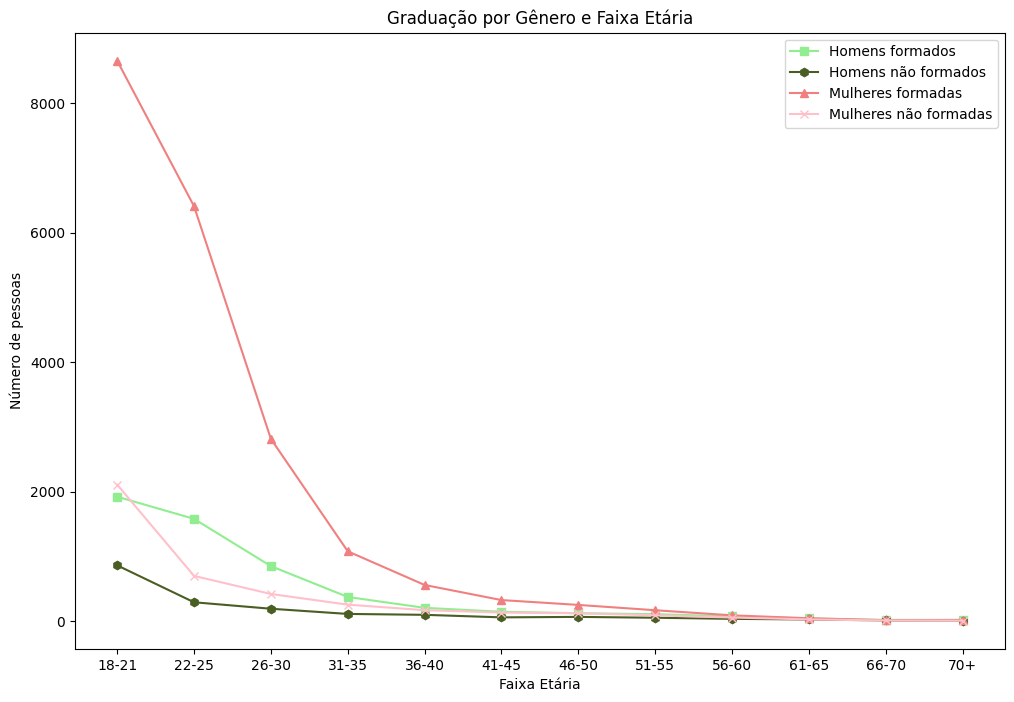

In [ ]:
import matplotlib.pyplot as plt

# Dados
faixa_etaria = ['18-21', '22-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '70+']
homens_graduados = [1921, 1579, 849, 373, 205, 144, 122, 107, 73, 41, 19, 18]
homens_nao_graduados = [861, 291, 191, 111, 97, 58, 65, 52, 35, 25, 11, 8]
mulheres_graduadas = [8654, 6407, 2814, 1078, 558, 325, 250, 168, 89, 44, 14, 18]
mulheres_nao_graduadas = [2107, 698, 419, 254, 169, 132, 121, 89, 55, 26, 10, 6]

# Criar gráfico de linhas
plt.figure(figsize=(12, 8))
plt.plot(faixa_etaria, homens_graduados, marker='s', label='Homens formados', color='lightgreen')
plt.plot(faixa_etaria, homens_nao_graduados, marker='h', label='Homens não formados', color='#4A5D23')
plt.plot(faixa_etaria, mulheres_graduadas, marker='^', label='Mulheres formadas', color='lightcoral')
plt.plot(faixa_etaria, mulheres_nao_graduadas, marker='x', label='Mulheres não formadas', color='pink')

# Adicionar rótulos e título
plt.xlabel('Faixa Etária')
plt.ylabel('Número de pessoas')
plt.title('Graduação por Gênero e Faixa Etária')
plt.legend()

# Remover grades do fundo
plt.grid(False)

# Exibir o gráfico
plt.show()



# **Interpretação**

- **Homens Graduados (azul) e Homens Não Graduados (azul claro):** A quantidade de homens graduados é relativamente baixa em comparação com homens não graduados em todas as faixas etárias. No entanto, há uma tendência geral de queda na quantidade de homens graduados à medida que a faixa etária aumenta, enquanto a quantidade de homens não graduados permanece relativamente estável ou diminui levemente.

- **Mulheres Graduadas (vermelho) e Mulheres Não Graduadas (vermelho claro):** A quantidade de mulheres graduadas é muito maior do que a quantidade de mulheres não graduadas em todas as faixas etárias. Além disso, há uma tendência geral de queda na quantidade de mulheres graduadas à medida que a faixa etária aumenta, enquanto a quantidade de mulheres não graduadas também diminui, mas de forma menos acentuada.

- **Tendências gerais:** Para ambos os gêneros, há uma diminuição na quantidade de graduados à medida que a faixa etária aumenta, o que pode indicar que a educação formal tende a ser concluída em idades mais jovens. Além disso, a diferença na quantidade de graduados entre homens e mulheres é notável, com mais mulheres graduadas em todas as faixas etárias.

# **Formação por estado civil**

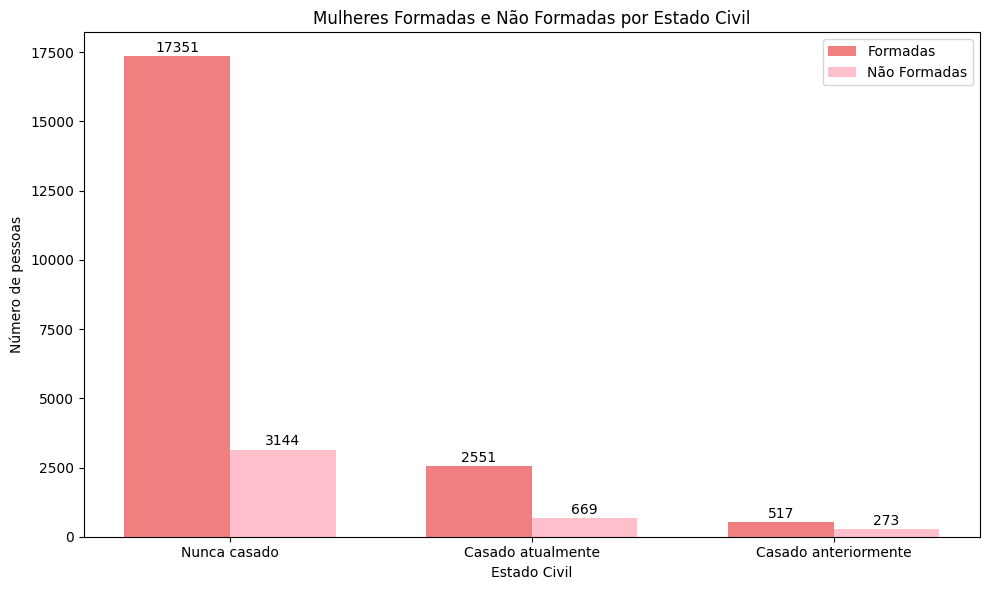

In [ ]:
# Filtrar mulheres com e sem formação
mulheres_formadas = data[(data['genero'] == 'Mulher') & (data['formacao'] == 'Com formação')]
mulheres_nao_formadas = data[(data['genero'] == 'Mulher') & (data['formacao'] == 'Sem formação')]

# Contar a quantidade de mulheres formadas e não formadas em cada estado civil
estado_civil_counts_formadas = mulheres_formadas["estado civil"].value_counts()
estado_civil_counts_nao_formadas = mulheres_nao_formadas["estado civil"].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))

# Definir largura das barras
bar_width = 0.35

# Plotar mulheres formadas
bars1 = plt.bar(range(len(estado_civil_counts_formadas)), estado_civil_counts_formadas.values,
                width=bar_width, color='lightcoral', label='Formadas')

# Plotar mulheres não formadas ao lado das formadas
bars2 = plt.bar([x + bar_width for x in range(len(estado_civil_counts_nao_formadas))],
                estado_civil_counts_nao_formadas.values,
                width=bar_width, color='pink', label='Não Formadas')

# Adicionar números sobre as barras de mulheres formadas
for i, count in enumerate(estado_civil_counts_formadas.values):
    plt.text(i, count + 50, count, ha='center', va='bottom')

# Adicionar números sobre as barras de mulheres não formadas
for i, count in enumerate(estado_civil_counts_nao_formadas.values):
    plt.text(i + bar_width, count + 50, count, ha='center', va='bottom')

# Adicionar título e rótulos dos eixos
plt.title('Mulheres Formadas e Não Formadas por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de pessoas')

# Adicionar legenda
plt.legend()

# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks([x + bar_width / 2 for x in range(len(estado_civil_counts_formadas))],
           estado_civil_counts_formadas.index)

# Exibir o gráfico
plt.tight_layout()
plt.show()


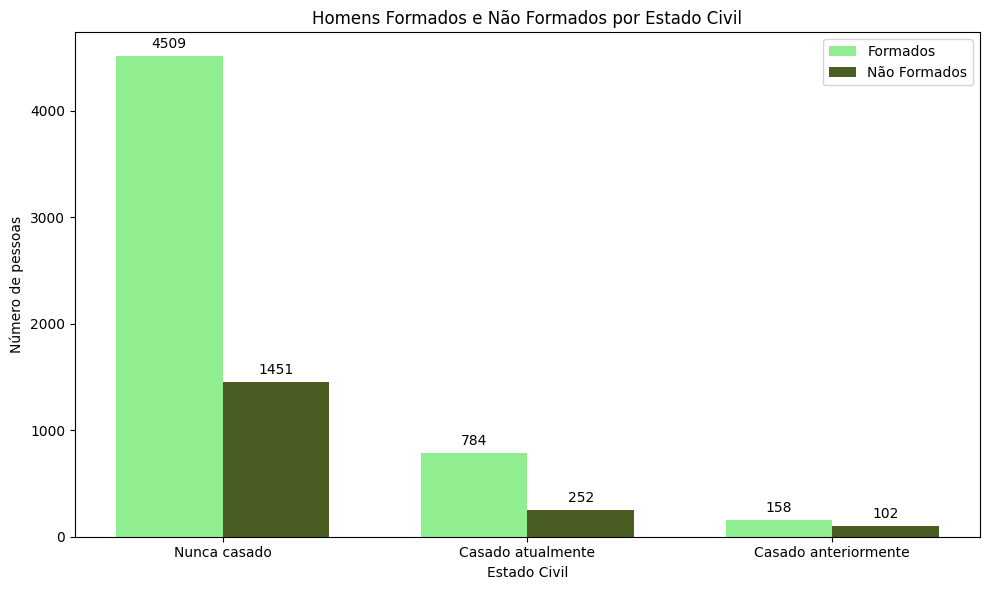

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar homens com e sem formação
homens_formados = data[(data['genero'] == 'Homem') & (data['formacao'] == 'Com formação')]
homens_nao_formados = data[(data['genero'] == 'Homem') & (data['formacao'] == 'Sem formação')]

# Contar a quantidade de homens formados e não formados em cada estado civil
estado_civil_counts_formados = homens_formados["estado civil"].value_counts()
estado_civil_counts_nao_formados = homens_nao_formados["estado civil"].value_counts()

# Combinar os dois DataFrames para garantir todas as categorias
all_estado_civil = estado_civil_counts_formados.index.union(estado_civil_counts_nao_formados.index)

estado_civil_counts_formados = estado_civil_counts_formados.reindex(all_estado_civil, fill_value=0)
estado_civil_counts_nao_formados = estado_civil_counts_nao_formados.reindex(all_estado_civil, fill_value=0)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))

# Definir largura das barras
bar_width = 0.35
indices = range(len(all_estado_civil))

# Plotar homens formados
bars1 = plt.bar(indices, estado_civil_counts_formados.values,
                width=bar_width, color='lightgreen', label='Formados')

# Plotar homens não formados ao lado dos formados
bars2 = plt.bar([x + bar_width for x in indices],
                estado_civil_counts_nao_formados.values,
                width=bar_width, color='#4A5D23', label='Não Formados')

# Adicionar números sobre as barras de homens formados
for i, count in enumerate(estado_civil_counts_formados.values):
    plt.text(i, count + 50, count, ha='center', va='bottom')

# Adicionar números sobre as barras de homens não formados
for i, count in enumerate(estado_civil_counts_nao_formados.values):
    plt.text(i + bar_width, count + 50, count, ha='center', va='bottom')

# Adicionar título e rótulos dos eixos
plt.title('Homens Formados e Não Formados por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de pessoas')

# Adicionar legenda
plt.legend()

# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks([x + bar_width / 2 for x in indices], all_estado_civil)

# Exibir o gráfico
plt.tight_layout()
plt.show()


# **Educaçao por gênero e localização**

In [ ]:
# Contagens de formados e não formados por gênero
formacao_por_genero = data.groupby(['genero', 'formacao']).size().unstack(fill_value=0)

# Contagens de formados e não formados por localização
formacao_por_localizacao = data.groupby(['local', 'formacao']).size().unstack(fill_value=0)


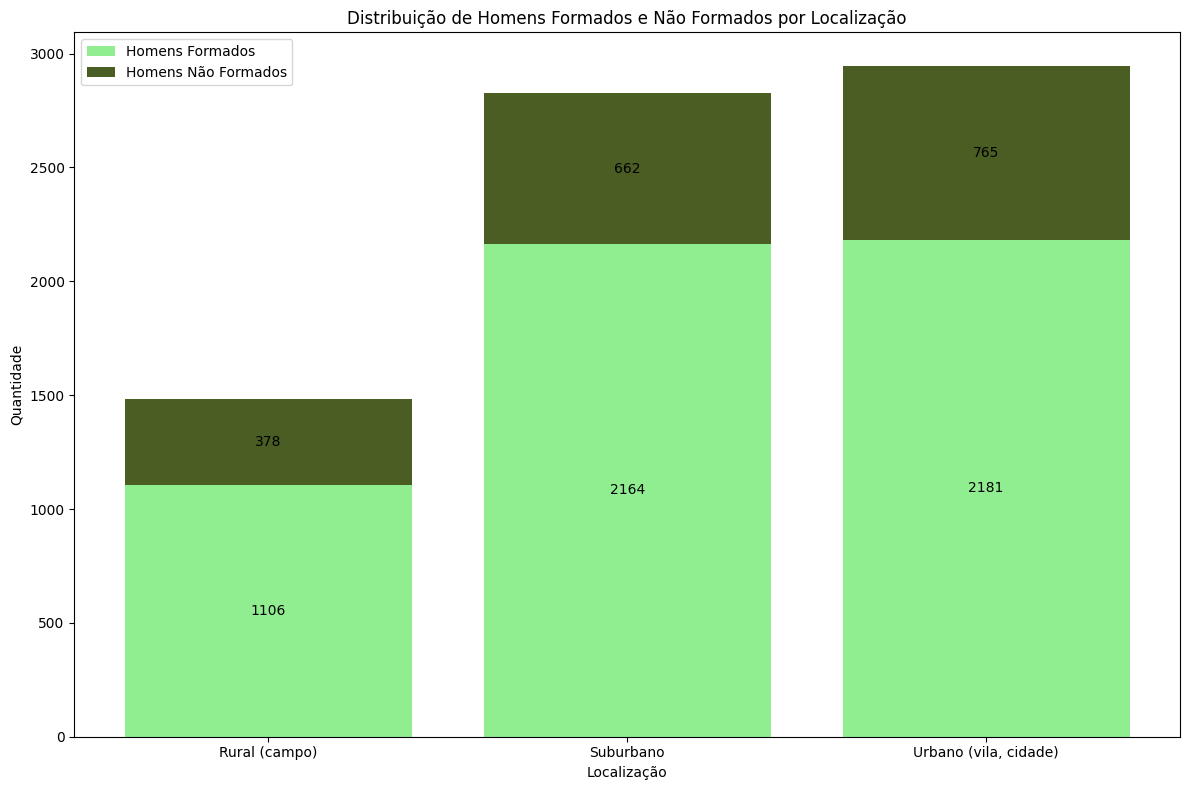

In [ ]:
import matplotlib.pyplot as plt

# Agrupar os dados por localização e formação apenas para homens
formacao_por_local_homem = data[data['genero'] == 'Homem'].groupby(['local', 'formacao']).size().unstack(fill_value=0)

# Selecionar as categorias de localização
categorias_localizacao = ['Rural (campo)', 'Suburbano', 'Urbano (vila, cidade)']

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
legend_added = False  # Variável para controlar a adição da legenda
for localizacao in categorias_localizacao:
    # Obter os dados para a localização atual
    dados_localizacao = formacao_por_local_homem.loc[localizacao]
    homens_formados = dados_localizacao.loc['Com formação']
    homens_nao_formados = dados_localizacao.loc['Sem formação']

    # Calcular a posição do texto no meio da barra
    meio_barra_formados = homens_formados / 2
    meio_barra_nao_formados = homens_formados + homens_nao_formados / 2

    # Criar as barras empilhadas apenas uma vez
    if not legend_added:
        plt.bar(localizacao, homens_formados, label='Homens Formados', color='lightgreen')
        plt.bar(localizacao, homens_nao_formados, bottom=homens_formados, label='Homens Não Formados', color='#4A5D23')
        legend_added = True
    else:
        plt.bar(localizacao, homens_formados, color='lightgreen')
        plt.bar(localizacao, homens_nao_formados, bottom=homens_formados, color='#4A5D23')

    # Adicionar a quantidade de homens formados e não formados no meio de cada barra
    plt.text(localizacao, meio_barra_formados, homens_formados, ha='center', va='center')
    plt.text(localizacao, meio_barra_nao_formados, homens_nao_formados, ha='center', va='center')

# Adicionar título e rótulos dos eixos
plt.title('Distribuição de Homens Formados e Não Formados por Localização')
plt.xlabel('Localização')
plt.ylabel('Quantidade')

# Adicionar a legenda
plt.legend()

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


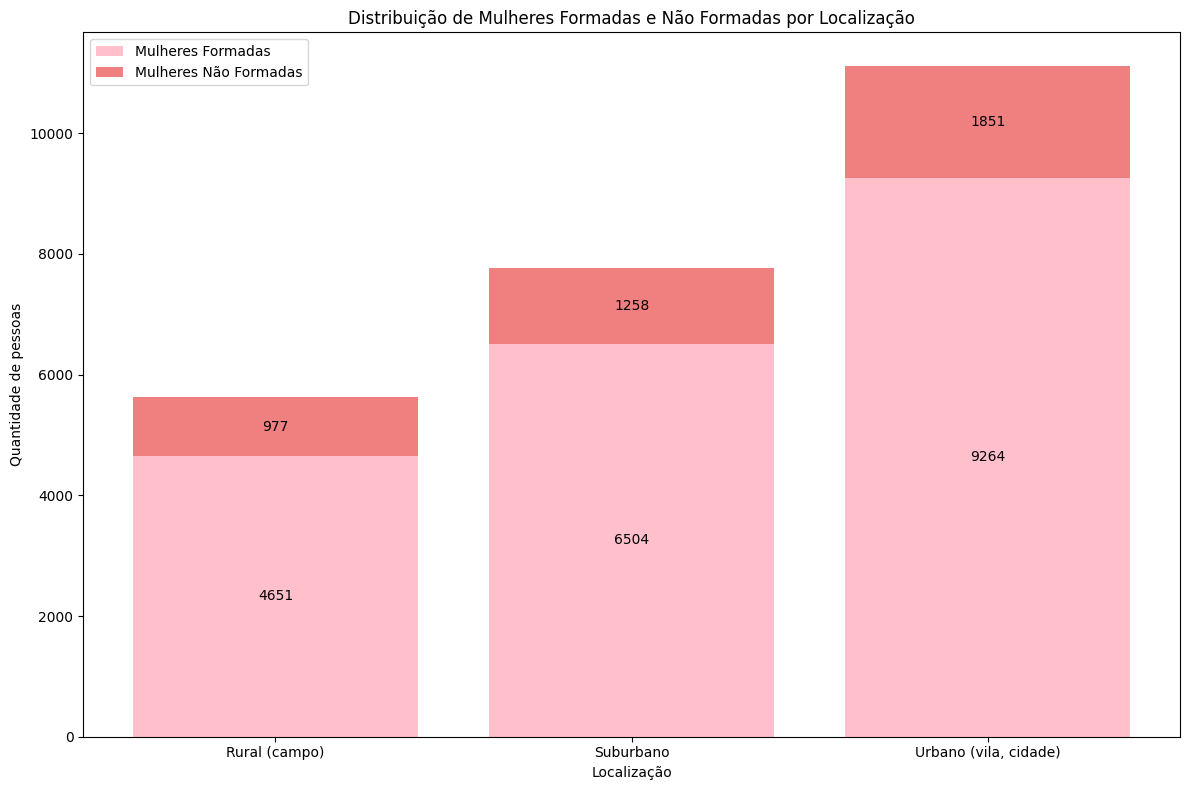

In [ ]:
import matplotlib.pyplot as plt

# Agrupar os dados por localização e formação apenas para mulheres
formacao_por_local_mulher = data[data['genero'] == 'Mulher'].groupby(['local', 'formacao']).size().unstack(fill_value=0)

# Selecionar as categorias de localização
categorias_localizacao = ['Rural (campo)', 'Suburbano', 'Urbano (vila, cidade)']

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
legend_added = False  # Variável para controlar a adição da legenda
for localizacao in categorias_localizacao:
    # Obter os dados para a localização atual
    dados_localizacao = formacao_por_local_mulher.loc[localizacao]
    mulheres_formadas = dados_localizacao.loc['Com formação']
    mulheres_nao_formadas = dados_localizacao.loc['Sem formação']

    # Calcular a posição do texto no meio da barra
    meio_barra_formadas = mulheres_formadas / 2
    meio_barra_nao_formadas = mulheres_formadas + mulheres_nao_formadas / 2

    # Criar as barras empilhadas apenas uma vez
    if not legend_added:
        plt.bar(localizacao, mulheres_formadas, label='Mulheres Formadas', color='pink')
        plt.bar(localizacao, mulheres_nao_formadas, bottom=mulheres_formadas, label='Mulheres Não Formadas', color='lightcoral')
        legend_added = True
    else:
        plt.bar(localizacao, mulheres_formadas, color='pink')
        plt.bar(localizacao, mulheres_nao_formadas, bottom=mulheres_formadas, color='lightcoral')

    # Adicionar a quantidade de mulheres formadas e não formadas no meio de cada barra
    plt.text(localizacao, meio_barra_formadas, mulheres_formadas, ha='center', va='center')
    plt.text(localizacao, meio_barra_nao_formadas, mulheres_nao_formadas, ha='center', va='center')

# Adicionar título e rótulos dos eixos
plt.title('Distribuição de Mulheres Formadas e Não Formadas por Localização')
plt.xlabel('Localização')
plt.ylabel('Quantidade de pessoas')

# Adicionar a legenda
plt.legend()

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Contagens de formados e não formados para homens:
# Com estresse
formados_homens_com_estresse = data[(data['genero'] == 'Homem') & (data['formacao'] == 'Com formação') & (data['estresse'] == 'Sim')].shape[0]
nao_formados_homens_com_estresse = data[(data['genero'] == 'Homem') & (data['formacao'] == 'Sem formação') & (data['estresse'] == 'Sim')].shape[0]
# Sem estresse
formados_homens_sem_estresse = data[(data['genero'] == 'Homem') & (data['formacao'] == 'Com formação') & (data['estresse'] == 'Não')].shape[0]
nao_formados_homens_sem_estresse = data[(data['genero'] == 'Homem') & (data['formacao'] == 'Sem formação') & (data['estresse'] == 'Não')].shape[0]



# Contagens de formadas e não formadas para mulheres:
# Com estresse
formados_mulheres_com_estresse = data[(data['genero'] == 'Mulher') & (data['formacao'] == 'Com formação') & (data['estresse'] == 'Sim')].shape[0]
nao_formados_mulheres_com_estresse = data[(data['genero'] == 'Mulher') & (data['formacao'] == 'Sem formação') & (data['estresse'] == 'Sim')].shape[0]
# Sem estresse
formados_mulheres_sem_estresse = data[(data['genero'] == 'Mulher') & (data['formacao'] == 'Com formação') & (data['estresse'] == 'Não')].shape[0]
nao_formados_mulheres_sem_estresse = data[(data['genero'] == 'Mulher') & (data['formacao'] == 'Sem formação') & (data['estresse'] == 'Não')].shape[0]

# Criando um DataFrame com os resultados
data_genero_formacao_estresse = pd.DataFrame({
    'Formados_Homens_Com_Estresse': [formados_homens_com_estresse],
    'Formados_Homens_Sem_Estresse':[formados_homens_sem_estresse],
    'Nao_Formados_Homens_Com_Estresse': [nao_formados_homens_com_estresse],
    'Nao_Formados_Homens_Sem_Estresse': [nao_formados_homens_sem_estresse],
    'Formados_Mulheres_Com_Estresse': [formados_mulheres_com_estresse],
    'Formados_Mulheres_Sem_Estresse':[formados_mulheres_sem_estresse],
    'Nao_Formados_Mulheres_Com_Estresse': [nao_formados_mulheres_com_estresse],
    'Nao_Formados_Mulheres_Sem_Estresse': [nao_formados_mulheres_sem_estresse],
})

data_genero_formacao_estresse

,Formados_Homens_Com_Estresse,Formados_Homens_Sem_Estresse,Nao_Formados_Homens_Com_Estresse,Nao_Formados_Homens_Sem_Estresse,Formados_Mulheres_Com_Estresse,Formados_Mulheres_Sem_Estresse,Nao_Formados_Mulheres_Com_Estresse,Nao_Formados_Mulheres_Sem_Estresse
0,4971,480,0,0,19437,982,0,0


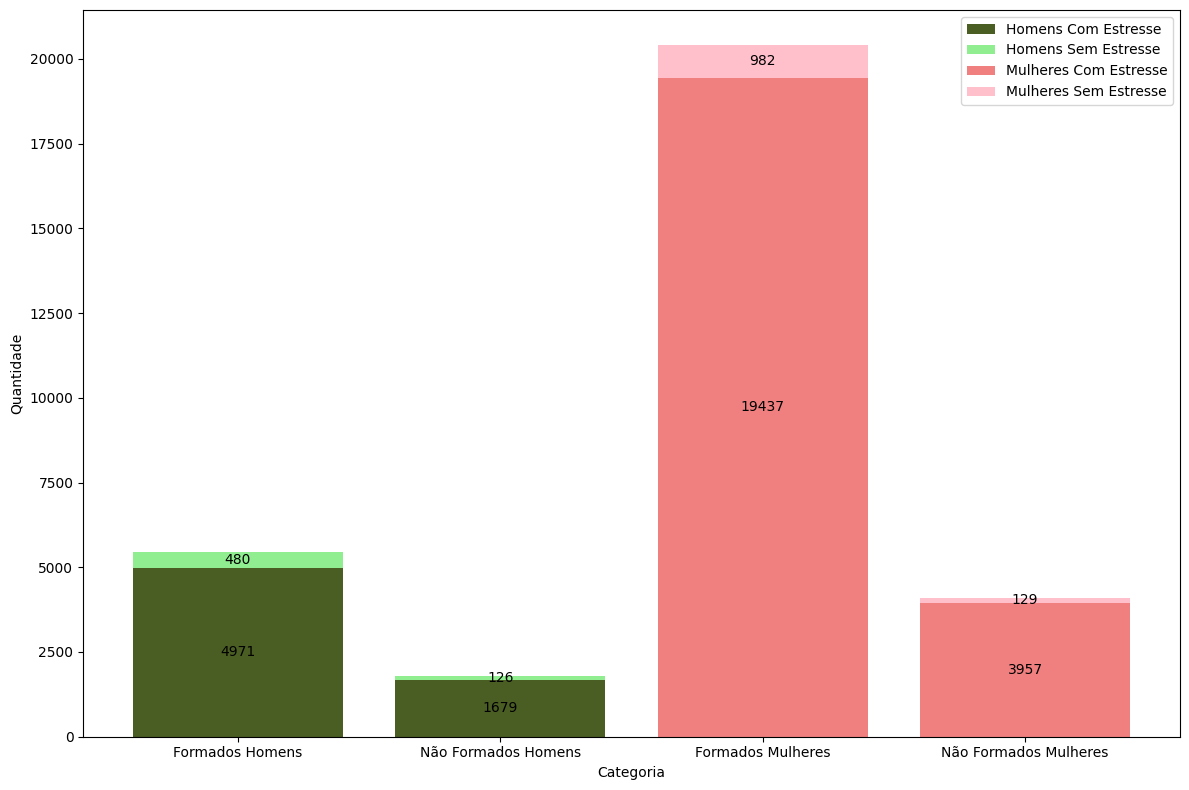

In [ ]:

# Contagens de formados e não formados para homens:
# Com estresse
formados_homens_com_estresse = data[(data['genero'] == 'Homem') & (data['formacao'] == 'Com formação') & (data['estresse'] == 'Sim')].shape[0]
nao_formados_homens_com_estresse = data[(data['genero'] == 'Homem') & (data['formacao'] == 'Sem formação') & (data['estresse'] == 'Sim')].shape[0]
# Sem estresse
formados_homens_sem_estresse = data[(data['genero'] == 'Homem') & (data['formacao'] == 'Com formação') & (data['estresse'] == 'Não')].shape[0]
nao_formados_homens_sem_estresse = data[(data['genero'] == 'Homem') & (data['formacao'] == 'Sem formação') & (data['estresse'] == 'Não')].shape[0]

# Contagens de formadas e não formadas para mulheres:
# Com estresse
formados_mulheres_com_estresse = data[(data['genero'] == 'Mulher') & (data['formacao'] == 'Com formação') & (data['estresse'] == 'Sim')].shape[0]
nao_formados_mulheres_com_estresse = data[(data['genero'] == 'Mulher') & (data['formacao'] == 'Sem formação') & (data['estresse'] == 'Sim')].shape[0]
# Sem estresse
formados_mulheres_sem_estresse = data[(data['genero'] == 'Mulher') & (data['formacao'] == 'Com formação') & (data['estresse'] == 'Não')].shape[0]
nao_formados_mulheres_sem_estresse = data[(data['genero'] == 'Mulher') & (data['formacao'] == 'Sem formação') & (data['estresse'] == 'Não')].shape[0]

# Criando um DataFrame com os resultados
data_genero_formacao_estresse = pd.DataFrame({
    'Com Estresse': [formados_homens_com_estresse, nao_formados_homens_com_estresse, formados_mulheres_com_estresse, nao_formados_mulheres_com_estresse],
    'Sem Estresse': [formados_homens_sem_estresse, nao_formados_homens_sem_estresse, formados_mulheres_sem_estresse, nao_formados_mulheres_sem_estresse]
}, index=['Formados Homens', 'Não Formados Homens', 'Formados Mulheres', 'Não Formados Mulheres'])

# Plotando o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))

# Barras empilhadas para homens
bar_homens_com_estresse = plt.bar(data_genero_formacao_estresse.index[:2], data_genero_formacao_estresse['Com Estresse'][:2], label='Homens Com Estresse', color='#4A5D23')
bar_homens_sem_estresse = plt.bar(data_genero_formacao_estresse.index[:2], data_genero_formacao_estresse['Sem Estresse'][:2], bottom=data_genero_formacao_estresse['Com Estresse'][:2], label='Homens Sem Estresse', color='lightgreen')

# Barras empilhadas para mulheres
bar_mulheres_com_estresse = plt.bar(data_genero_formacao_estresse.index[2:], data_genero_formacao_estresse['Com Estresse'][2:], label='Mulheres Com Estresse', color='lightcoral')
bar_mulheres_sem_estresse = plt.bar(data_genero_formacao_estresse.index[2:], data_genero_formacao_estresse['Sem Estresse'][2:], bottom=data_genero_formacao_estresse['Com Estresse'][2:], label='Mulheres Sem Estresse', color='pink')

# Adicionar as quantidades no meio das barras
for i in range(len(data_genero_formacao_estresse)):
    meio_barra_com_estresse = data_genero_formacao_estresse['Com Estresse'][i] / 2
    meio_barra_sem_estresse = data_genero_formacao_estresse['Com Estresse'][i] + data_genero_formacao_estresse['Sem Estresse'][i] / 2
    plt.text(i, meio_barra_com_estresse, data_genero_formacao_estresse['Com Estresse'][i], ha='center', va='center', color='black')
    plt.text(i, meio_barra_sem_estresse, data_genero_formacao_estresse['Sem Estresse'][i], ha='center', va='center', color='black')

# Adicionar título e rótulos dos eixos
plt.xlabel('Categoria')
plt.ylabel('Quantidade')

# Adicionar a legenda
plt.legend()

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# **Associações entre as variáveis**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, pearsonr, spearmanr

# Carregar os dados (substitua pelo seu método de carregamento de dados)
df = pd.read_excel('DB_TCC_FINAL.xlsx')

# Teste de qui-quadrado (\(\chi^2\))
def chi2_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Correlação de Pearson
def pearson_corr(df, col1, col2):
    correlation, p_value = pearsonr(df[col1], df[col2])
    return correlation, p_value

# Correlação de Spearman
def spearman_corr(df, col1, col2):
    correlation, p_value = spearmanr(df[col1], df[col2])
    return correlation, p_value

# Realizando os testes
results = {}

# Qui-quadrado para estresse e formacao
results['chi2_stress_education'] = chi2_test(df, 'estresse', 'educacao')
results['chi2_stress_formation'] = chi2_test(df, 'estresse', 'formacao')
results['chi2_stress_civil_status'] = chi2_test(df, 'estresse', 'estado civil')
results['chi2_stress_gender'] = chi2_test(df, 'estresse', 'genero')
results['chi2_stress_local'] = chi2_test(df, 'estresse', 'local')

# Correlação de Pearson para estresse e educação
# Note que estresse e educação precisam ser codificados numericamente para Pearson
df['estresse_num'] = df['estresse'].astype('category').cat.codes
df['educacao_num'] = df['educacao'].astype('category').cat.codes
results['pearson_stress_education'] = pearson_corr(df, 'estresse_num', 'educacao_num')

# Correlação de Pearson para estresse e genero
df['genero_num'] = df['genero'].astype('category').cat.codes
results['pearson_stress_gender'] = pearson_corr(df, 'estresse_num', 'genero_num')

# Correlação de Spearman para estresse e educação
results['spearman_stress_education'] = spearman_corr(df, 'estresse_num', 'educacao_num')

# Correlação de Spearman para estresse e idade
results['spearman_stress_age'] = spearman_corr(df, 'estresse_num', 'idade')

# Exibindo os resultados
for test, result in results.items():
    print(f"{test}: {result}")


chi2_stress_education: (62.987358369242436, 6.827595815959303e-13)
chi2_stress_formation: (16.158543930078398, 5.825519804918e-05)
chi2_stress_civil_status: (98.45171033027047, 4.182950591840707e-22)
chi2_stress_gender: (158.8335022957977, 2.0347904615981073e-36)
chi2_stress_local: (2.2366479851485344, 0.32682710049793423)
pearson_stress_education: (-0.04314574902562425, 1.4423209719384022e-14)
pearson_stress_gender: (0.07088283853516213, 1.1493372212436103e-36)
spearman_stress_education: (-0.040902050584203105, 3.049998189648444e-13)
spearman_stress_age: (-0.0606964882901266, 2.573960070723054e-27)


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, pearsonr

# Carregar os dados (substitua pelo seu método de carregamento de dados)
df = pd.read_excel('DB_TCC_FINAL.xlsx')

# Teste de qui-quadrado (\(\chi^2\))
def chi2_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Testes de qui-quadrado (\(\chi^2\))
chi2_stress_formation = chi2_test(df, 'estresse', 'formacao')
chi2_stress_civil_status = chi2_test(df, 'estresse', 'estado civil')
chi2_stress_gender = chi2_test(df, 'estresse', 'genero')
chi2_stress_local = chi2_test(df, 'estresse', 'local')

# Resultados fornecidos
chi2_stress_education = (62.987358369242436, 6.827595815959303e-13)
chi2_stress_formation = (16.158543930078398, 5.825519804918e-05)
chi2_stress_civil_status = (98.45171033027047, 4.182950591840707e-22)
chi2_stress_gender = (158.8335022957977, 2.0347904615981073e-36)
chi2_stress_local = (2.2366479851485344, 0.32682710049793423)
pearson_stress_education = (-0.04314574902562425, 1.4423209719384022e-14)
pearson_stress_gender = (0.07088283853516213, 1.1493372212436103e-36)

# Criando a tabela
data = {
    "Variável": ["Estresse", "Formação", "Estado civil", "Gênero", "Local"],
    "n": ["Sim: 30045, Não: 1717", "Sim: 25871, Não: 5891",
          "Casado: 4256, Solteiro: 26456, Divorciado/Viúvo: 1050",
          "Homem: 7256, Mulher: 24506",
          "Rural: 7112, Urbano: 14061, Suburbano: 10588"],
    "Porcentagem (%)": ["94,6%, 5,4%", "81,45%, 18,55%",
                        "13,4%, 83,3%, 3,3%",
                        "22,7%, 77,3%",
                        "22,4%, 44,27%, 33,33%"],
    "Nível de Mensuração": ["Nominal", "Nominal", "Nominal", "Nominal", "Nominal"],
    "Teste": ["Estresse e formação: X^2", "Estresse e estado civil: X^2",
              "Estresse e estado civil: X^2", "Estresse e gênero: X^2",
              "Estresse e local: X^2"],
    "Resultado": [
        f"X^2: {chi2_stress_education[0]:.2f}, p-value: {chi2_stress_education[1]:.4e}",
        f"X^2: {chi2_stress_formation[0]:.2f}, p-value: {chi2_stress_formation[1]:.4e}",
        f"X^2: {chi2_stress_civil_status[0]:.2f}, p-value: {chi2_stress_civil_status[1]:.4e}",
        f"X^2: {chi2_stress_gender[0]:.2f}, p-value: {chi2_stress_gender[1]:.4e}",
        f"X^2: {chi2_stress_local[0]:.2f}, p-value: {chi2_stress_local[1]:.4e}"
    ]
}

# Adicionando os resultados de Pearson
pearson_results = {
    "Variável": ["Estresse", "Estresse"],
    "n": ["Sim: 30045, Não: 1717", "Sim: 30045, Não: 1717"],
    "Porcentagem (%)": ["94,6%, 5,4%", "94,6%, 5,4%"],
    "Nível de Mensuração": ["Nominal", "Nominal"],
    "Teste": ["Estresse e educação: Pearson", "Estresse e gênero: Pearson"],
    "Resultado": [
        f"Pearson: {pearson_stress_education[0]:.2f}, p-value: {pearson_stress_education[1]:.4e}",
        f"Pearson: {pearson_stress_gender[0]:.2f}, p-value: {pearson_stress_gender[1]:.4e}"
    ]
}

# Criando os DataFrames
table_df = pd.DataFrame(data)
pearson_df = pd.DataFrame(pearson_results)

# Concatenando as tabelas
final_df = pd.concat([table_df, pearson_df], ignore_index=True)

# Exibindo a tabela
print(final_df.to_string(index=False))


    Variável                                                     n       Porcentagem (%) Nível de Mensuração                        Teste                           Resultado
    Estresse                                 Sim: 30045, Não: 1717           94,6%, 5,4%             Nominal     Estresse e formação: X^2     X^2: 62.99, p-value: 6.8276e-13
    Formação                                 Sim: 25871, Não: 5891        81,45%, 18,55%             Nominal Estresse e estado civil: X^2     X^2: 16.16, p-value: 5.8255e-05
Estado civil Casado: 4256, Solteiro: 26456, Divorciado/Viúvo: 1050    13,4%, 83,3%, 3,3%             Nominal Estresse e estado civil: X^2     X^2: 98.45, p-value: 4.1830e-22
      Gênero                            Homem: 7256, Mulher: 24506          22,7%, 77,3%             Nominal       Estresse e gênero: X^2    X^2: 158.83, p-value: 2.0348e-36
       Local          Rural: 7112, Urbano: 14061, Suburbano: 10588 22,4%, 44,27%, 33,33%             Nominal        Estresse e loc

# **Regressão logística**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar o banco de dados
df = pd.read_excel('DB_TCC.xlsx')

# Definir as variáveis explicativas e a variável resposta
X = df[['local', 'genero', 'idade', 'estado civil', 'area_formacao', 'categoria_educacao']]
y = df['estresse']

# Converter variáveis categóricas usando one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo de regressão logística com ajuste de peso de classe
model = LogisticRegression(class_weight='balanced')

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(class_report)


Acurácia: 0.6402560604470564
Matriz de Confusão:
[[ 288  227]
 [3201 5813]]
Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.08      0.56      0.14       515
         Sim       0.96      0.64      0.77      9014

    accuracy                           0.64      9529
   macro avg       0.52      0.60      0.46      9529
weighted avg       0.91      0.64      0.74      9529



# **Análise dos Resultados:**

**Acurácia:**
A acurácia caiu para 0.64, o que é esperado quando o modelo começa a tentar aprender a classificar a classe minoritária.

**Matriz de Confusão:**

Classe Não: 288 predições corretas e 227 incorretas.
Classe Sim: 5813 predições corretas e 3201 incorretas.

**Relatório de Classificação:**
Classe Não: A precisão é baixa (0.08), mas o recall melhorou para 0.56, indicando que o modelo está começando a identificar instâncias da classe Não.
Classe Sim: Boa precisão (0.96), mas recall caiu para 0.64, mostrando que o modelo está sacrificando algumas predições corretas da classe majoritária para melhorar a detecção da classe minoritária.

**Estratégias para Melhorar o Modelo:**

**Ajuste de Hiperparâmetros:**
Otimize os hiperparâmetros do modelo de regressão logística usando uma busca em grade (Grid Search) para encontrar os melhores valores para C (inverso da regularização) e class_weight.

**Métodos de Amostragem:**
Utilize técnicas de sobremostragem da classe minoritária (e.g., SMOTE) ou subamostragem da classe majoritária para balancear melhor o conjunto de dados.

Modelos Alternativos:
Considere utilizar outros algoritmos de machine learning que possam lidar melhor com desbalanceamento, como Random Forest ou Gradient Boosting.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir o modelo
model = LogisticRegression()

# Definir a grade de parâmetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': ['balanced', {0: 1, 1: 10}, {0: 1, 1: 50}, {0: 1, 1: 100}]
}

# Configurar a busca em grade
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted')

# Treinar a busca em grade
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(ite

Acurácia: 0.6407807744779095
Matriz de Confusão:
[[ 286  229]
 [3194 5820]]
Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.08      0.56      0.14       515
         Sim       0.96      0.65      0.77      9014

    accuracy                           0.64      9529
   macro avg       0.52      0.60      0.46      9529
weighted avg       0.91      0.64      0.74      9529



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Carregar o banco de dados
df = pd.read_excel('DB_TCC.xlsx')

# Definir as variáveis explicativas e a variável resposta
X = df[['local', 'genero', 'idade', 'estado civil', 'area_formacao', 'categoria_educacao']]
y = df['estresse']

# Converter variáveis categóricas usando one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar SMOTE no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Definir o modelo
model = LogisticRegression()

# Definir a grade de parâmetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': ['balanced', {0: 1, 1: 10}, {0: 1, 1: 50}, {0: 1, 1: 100}]
}

# Configurar a busca em grade
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted', error_score='raise')

# Treinar a busca em grade
try:
    grid_search.fit(X_train_smote, y_train_smote)
    best_model = grid_search.best_estimator_

    # Fazer previsões no conjunto de teste
    y_pred = best_model.predict(X_test)

    # Avaliar o modelo
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'Acurácia: {accuracy}')
    print('Matriz de Confusão:')
    print(conf_matrix)
    print('Relatório de Classificação:')
    print(class_report)
except ValueError as e:
    print(f"Erro na busca em grade: {e}")
except AttributeError as e:
    print(f"Erro ao acessar o melhor estimador: {e}")


Erro na busca em grade: The classes, ['Não', 'Sim'], are not in class_weight


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Treinar um modelo de Random Forest
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train_smote, y_train_smote)

# Fazer previsões no conjunto de teste
y_pred_rf = model_rf.predict(X_test)

# Avaliar o modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Acurácia: {accuracy_rf}')
print('Matriz de Confusão:')
print(conf_matrix_rf)
print('Relatório de Classificação:')
print(class_report_rf)


Acurácia: 0.8888655682652954
Matriz de Confusão:
[[  47  468]
 [ 591 8423]]
Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.07      0.09      0.08       515
         Sim       0.95      0.93      0.94      9014

    accuracy                           0.89      9529
   macro avg       0.51      0.51      0.51      9529
weighted avg       0.90      0.89      0.89      9529

